# Animating the Levy's construction of Brownian Motion

**Pablo Zúñiga Rodríguez-Peña\
Student at the Department of Mathematical Engineering, University of Chile**

## On the Lévy's proof

Recall that a stochastic process $(B_t)_{t\geq0}$ is called *Standard Brownian Motion* if it satisfies the following conditions:

- $B_0=0$ a.s.
- For every $n\in\mathbb{N}$ and times $t_1,\dots,t_n\in\mathbb{R}_+$ with $t_1<\dots<t_n$, the increments $B_{t_2}-B_{t_1},\dots,B_{t_n}-B_{t_{n-1}}$ are independent random variables.
- For every $s,t\in\mathbb{R}_+$ with $s\leq t$, $B_t-B_s\sim\mathscr{N}(0,t-s)$.
- The sample path $t\mapsto B_t(w)$ is $\mathbb{P}(w)$-a.e. continuous.

Then we have the following theorem.

**Theorem (Wiener, 1923):** Standard Brownian Motion exists.

There exists many proofs for the Wiener's theorem, but there is one that's specially beautiful because of its geometry. That is the Paul Lévy's construction of Brownian Motion, which goes as follows. Define the *dyadic numbers up to level $i$* by

$$\mathcal{D}_i:=\left\{\frac{k}{2^i}: k\in\{0,\dots,2^i\}\right\},$$ 

and the dyadic numbers on $[0,1]$ by $\mathcal{D}:=\cup_{n\in\mathbb{N}}\mathcal{D}_n$. Then,

- Start with a countable collection $(Z_d)_{d\in\mathcal{D}}$ of independent standard normal random variables.
- Define for each $i\geq1$ the piecewise linear functions on $[0,1]$ by

$$
\begin{align}
F_0(t)=
\begin{cases}
    0, & \text{if }t=0,\\
    Z_1, & \text{if }t=1,\\
    \text{linear in between},
\end{cases}
\quad\text{and}\quad
F_i(t)=
\begin{cases}
    2^{-(i+1)/2}Z_t, & \text{if }t\in\mathcal{D}_i\setminus\mathcal{D}_{i-1},\\
    0, & \text{if }t\in\mathcal{D}_{i-1},\\
    \text{linear between consecutive points in }\mathcal{D}_i.
\end{cases}
\end{align}
$$

- Construct the value of the Brownian Motion at time $t\in[0,1]$ as the limit $B_t:=\sum_{n\in\mathbb{N}}F_n(t)$, which is indeed an uniform limit for the infinity norm.

- Finally, glue a countable collection of independent Brownian Motions defined on $[0,1]$ to obtain the stochastic process $(B_t)_{t\geq0}$.

Such process satisfies every property of a standard Brownian Motion and the proof is finished. You can check the details on the book *Brownian Motion* by Y. Peres and P. Mörters.

## What's this script about

The aim of this script is to animate the Levy's construction adding up the functions $(F_i)_{i\in\mathbb{N}}$ up to a given dyadic level $n$. Consider that computing dyadic numbers up to a big level and interpolating the scaled random variables values is computationally expensive and you shouldn't try for levels greater than $13$. On the other hand, I don't know if this is the most efficient way to get such animations, the focus is to watch the geometric process of the Lévy's construction and no other. If the code admits efficiency improvements, you're welcome to contribute.

I hope that this script to help anyone who needs to animate the Lévy's construction or something similar and use this code as a base for your own purposes. 

## Let's code

No more blablabla. The following cells animate the Lévy's construction described before.

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from celluloid import Camera

In [20]:
def get_indices(t, s):
    '''
    For t and s arrays, where s is a subset of t, returns
    a list with the indices of s as an element in t.
    '''
    return np.argwhere(np.in1d(t, s)).flatten()


def LevyConstructionBM(n):
    '''
    Constructs the functions Fi and the successive
    aproximations of B in the unitary time interval.
    '''
    dyadics = [np.arange(2 ** i + 1) / 2 ** i for i in range(n + 1)]
    time = dyadics[-1]  # Time grid is the last level
    indices = [get_indices(time, dyadic) for dyadic in dyadics]
    # Normal distributed random vector indexed by time
    Z = np.random.normal(size=len(time))
    Z_scaled = [np.array([0, Z[-1]])]  # Well scaled values of Z
    for i, (current_level, previous_level) in enumerate(
            zip(indices[1:], indices[:-1]), 1
    ):
        z = np.where(
            np.in1d(current_level, previous_level),
            2 ** (-(i + 1) / 2) * Z[current_level],
            0.0,
        )
        Z_scaled.append(z)
    # F_i functions whose cumulative sum approximates B
    F = [sp.interpolate.interp1d(time[index], z) for index, z in zip(indices, Z_scaled)]

    # Succesive approximations of B
    # "Definitive" approximation i2s B[-1]
    def B(i):
        return np.vectorize(lambda t: sum(f(t) for f in F[:i]))

    return time, F, B


def animateLevyConstruction(t, B, figsize, title, xlabel, ylabel, grid, color, blit, interval, name, ext, fps, n):
    all_B = np.array(B(n+1)(t))
    maxB = np.max(all_B)
    minB = np.min(all_B)
    fig = plt.figure(figsize=figsize)
    camera = Camera(fig)
    if grid:
        plt.grid()
    if title:
        plt.title("Lévy's construction of Brownian Motion", fontsize=30)
    if xlabel:
        plt.xlabel(r'$t\in[0,1]$', fontsize=20)
    if ylabel:
        plt.ylabel(r'$B$', fontsize=20)
    plt.ylim(minB, maxB)
    for i in range(1, n+2):
        plt.plot(t, B(i)(t), color=color, linewidth=2)
        camera.snap()
    anim = camera.animate(blit=blit, interval=interval)
    anim.save(name+'.'+ext, writer='Pillow', fps=fps)

## Small test for $n=11$

In [24]:
np.random.seed(9)
n = 11
t, F, B = LevyConstructionBM(n)

MovieWriter Pillow unavailable; using Pillow instead.


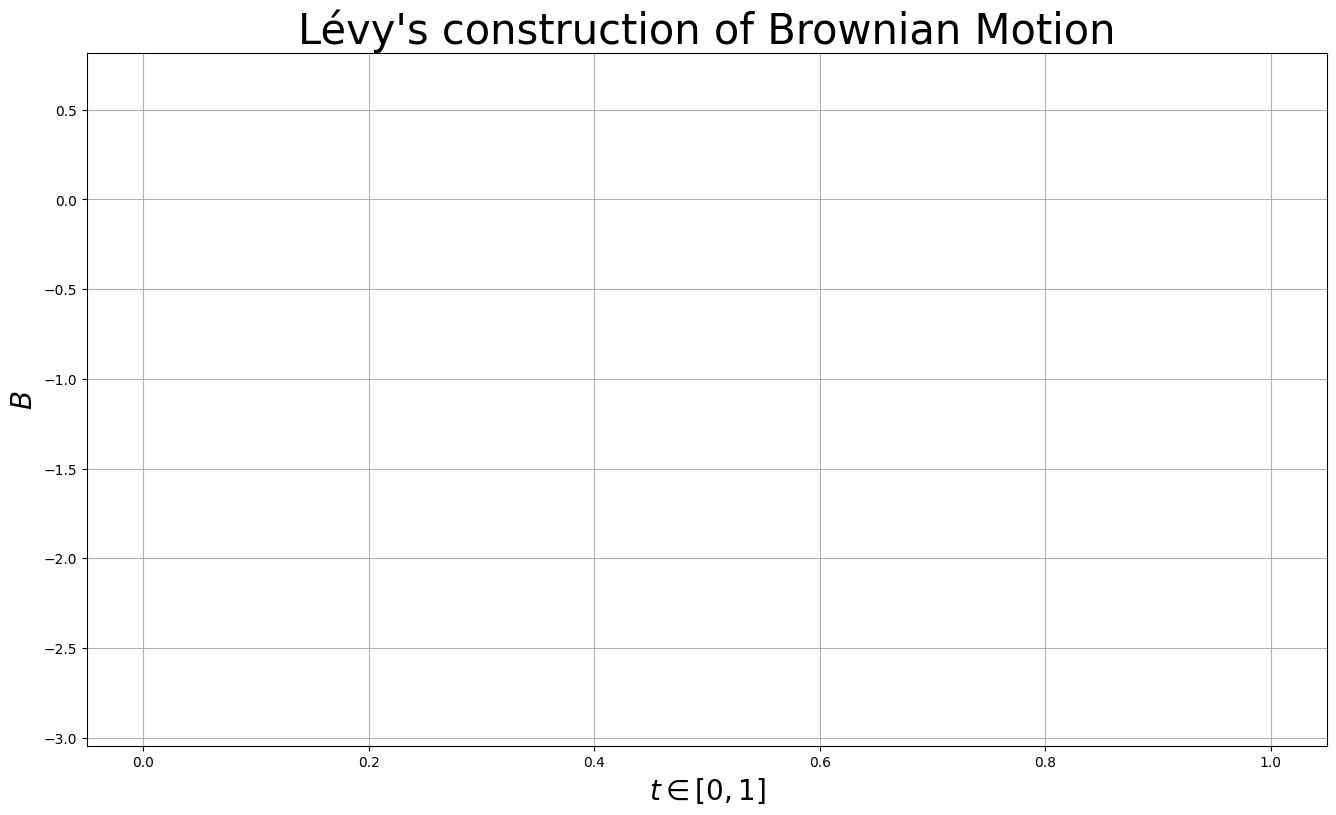

In [25]:
animateLevyConstruction(t=t, 
                        B=B, 
                        figsize=(16, 9),
                        title=True,
                        xlabel=True, 
                        ylabel=True, 
                        grid=True, 
                        color='blue', 
                        blit=False, 
                        interval=100, 
                        name='levy', 
                        ext='gif', 
                        fps=2,
                        n=n,
                        )
